# **Data Mining - Class Assignment W07 Data Transformation and K-Means Clustering**

### M. Ilham Fadhilah Wirayudha - 0706022310062

<br>

# **Part A: Data Understanding, Cleaning, Visualizations**

### Import Libraries

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Exploratory Data Analysis

In [360]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Check & Handle Missing Values / Duplicates

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [362]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Rename The Annual Income(k$) & Spending Score (1-100) Column

In [363]:
df = df.rename(columns={"Annual Income (k$)": "Income"})
df = df.rename(columns={"Spending Score (1-100)": "Spending_Score"})
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 3 Insightful Visualizations & The Explanations

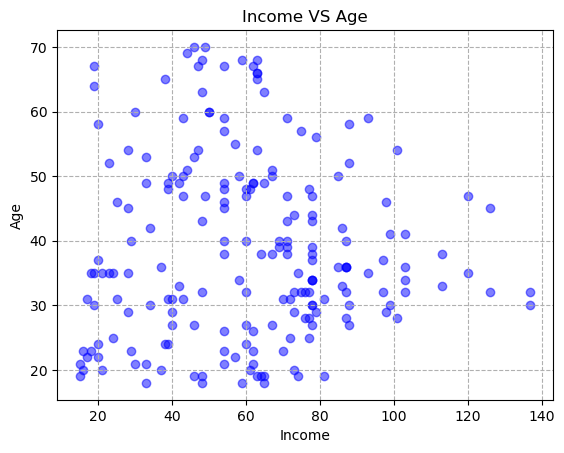

In [364]:
plt.scatter(df['Income'], df['Age'], color='blue', alpha=0.5)
plt.title('Income VS Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

# The scatter plot shows no clear relationship between income and age 
# Most individuals aged 25–45 have incomes between 30–80
# Indicating that income levels vary widely regardless of age

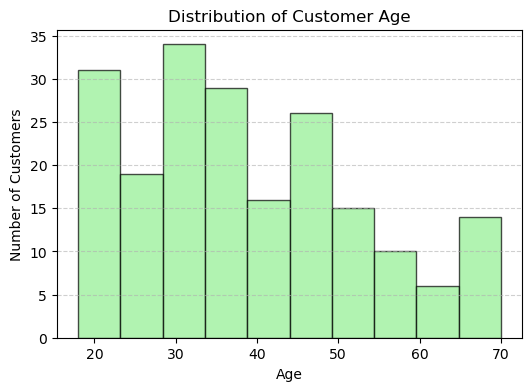

In [365]:
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=10, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Most customers are aged 20–40, with a peak around the late 20s to early 30s
# Showing that the business mainly attracts a younger demographic

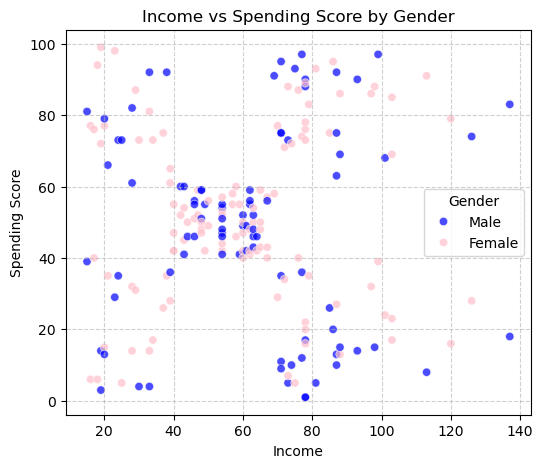

In [366]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x='Income',
    y='Spending_Score',
    hue='Gender',
    data=df,
    alpha=0.7,
    palette={'Male': 'blue', 'Female': 'pink'}
)
plt.title('Income vs Spending Score by Gender')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# The scatter plot shows no strong correlation between income and spending score for either gender
# However, females (pink) generally have higher spending scores across various income levels
# While males (blue) are more concentrated in the mid-range spending scores
# Suggesting that female customers tend to spend more actively regardless of income

<br>

# **Part B: Data Transformation**

### Encoding the Gender Column

In [367]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) # Male = 1, Female = 0 

df.head()

# LabelEncoder() converts text labels in Gender into numbers (e.g., Male = 1, Female = 0)
# Allowing K-Means to process the data. Now the dataset contains only numeric values
# Enabling it to be used for clustering, now the dataset contains only numeric values
# Enabling it to be used for clustering

,CustomerID,Gender,Age,Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Feature Selection and Scaling

In [368]:
# Select numeric features for clustering
X = df[['Age', 'Income', 'Spending_Score']]


# Initialize scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Convert back to DataFrame for clarity
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


X_scaled.head()

,Age,Income,Spending_Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Visualization of Scaled Data

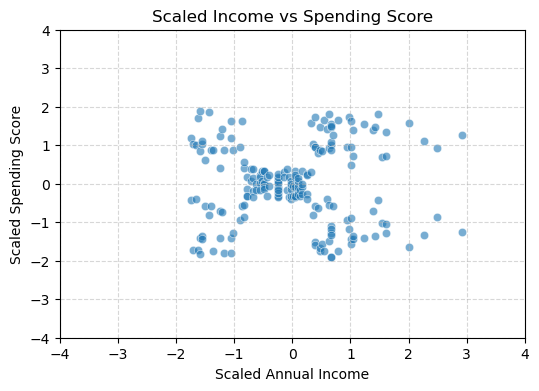

In [369]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_scaled['Income'], 
                y=X_scaled['Spending_Score'], 
                alpha=0.6)
plt.title('Scaled Income vs Spending Score')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# This scatter plot confirms that both features are now on similar scales (roughly between -2 and +3)
# Scaling ensures fair distance calculations for K-Means and prevents income values from dominating clustering results.

<br>

# **Part C: Choosing K**

### Elbow Method

c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

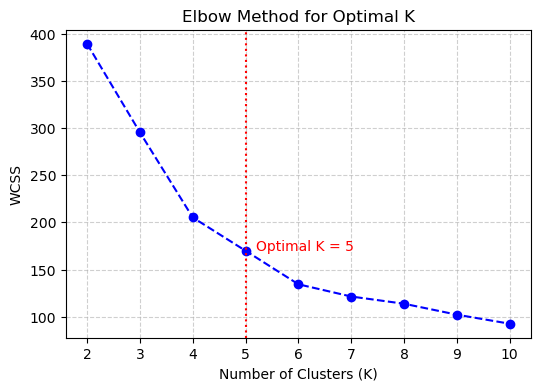

In [370]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True, linestyle='--', alpha=0.6)

# Highlight optimal K
optimal_k = 5
plt.axvline(x=optimal_k, color='red', linestyle=':', linewidth=1.5)
plt.text(optimal_k+0.2, wcss[optimal_k-2], f'Optimal K = {optimal_k}', color='red', fontsize=10)

plt.show()

# The elbow method plot shows a clear bend at K=5, indicating that 5 clusters is an optimal choice
# Beyond K=5, the decrease in WCSS becomes more gradual, suggesting diminishing returns in clustering qualitY

<br>

# **Part D: Modeling with K-Means**

### Fit the K-Means Model

In [371]:
from sklearn.cluster import KMeans

# Apply K-Means with K = 5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Preview data with cluster labels
df.head()

# The K-Means algorithm divides customers into five clusters based on similarities in age, annual income, and spending score 
# Each customer is now assigned a cluster label (0–4), representing their segment group


c:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Income,Spending_Score,Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,2
4,5,0,31,17,40,2


### Visualize Clusters

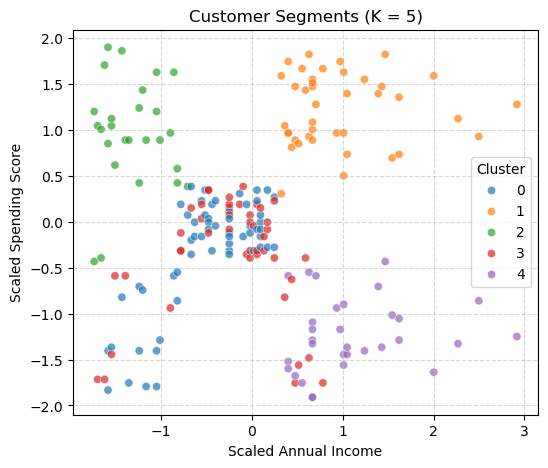

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.scatterplot(
    x=X_scaled['Income'],
    y=X_scaled['Spending_Score'],
    hue=df['Cluster'],
    palette='tab10',
    alpha=0.7
)
plt.title('Customer Segments (K = 5)')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Each color represents one customer cluster. Distinct groups are visible 
# Showing that K-Means successfully segmented customers based on their income and spending behavior

### Cluster Centers

In [373]:
centers = kmeans.cluster_centers_
cluster_centers = pd.DataFrame(centers, columns=X.columns)
cluster_centers

,Age,Income,Spending_Score
0,1.178830,-0.493886,-0.329716
1,-0.428806,0.974847,1.216085
2,-0.938764,-1.314731,0.956802
3,-0.869573,-0.238517,-0.360609
4,0.397379,1.115089,-1.231270


<br>

# **Part E: Cluster Profiling & Insights**

### Cluster Summary Table

In [374]:
cluster_summary = df.groupby('Cluster')[['Age', 'Income', 'Spending_Score', 'Gender']].mean()
cluster_summary

,Age,Income,Spending_Score,Gender
Cluster,,,,
0,55.275862,47.620690,41.706897,0.431034
1,32.875000,86.100000,81.525000,0.450000
2,25.769231,26.115385,74.846154,0.423077
3,26.733333,54.311111,40.911111,0.400000
4,44.387097,89.774194,18.483871,0.516129


### Managerial Implications (Actionable)

Cluster 1 – High Income, High Spending
- Targeting: Premium customers who spend a lot; focus on luxury products and services.
- Campaign Channels: Personalized emails, VIP events, mobile app notifications, loyalty programs.
- Pricing / Offer Design: Bundled premium packages, limited editions, seasonal promotions.
- Retention Ideas: Exclusive rewards, early access to sales, concierge or VIP services.

Cluster 2 – Low Income, High Spending
- Targeting: Value-conscious but impulsive buyers; highlight attractive deals.
- Campaign Channels: Social media campaigns, flash sales, SMS promotions.
- Pricing / Offer Design: Discounted bundles, time-limited offers, loyalty points.
- Retention Ideas: Reward frequent purchases, gamified campaigns, referral incentives.

Cluster 3 – Middle Income, Moderate Spending
- Targeting: Mainstream customers; open to occasional premium purchases.
- Campaign Channels: Email newsletters, targeted ads, in-store promotions.
- Pricing / Offer Design: Mid-tier product bundles, combo offers, seasonal discounts.
- Retention Ideas: Personalized suggestions, points-based rewards, regular engagement.

Cluster 4 – Low Income, Low Spending
- Targeting: Budget-sensitive customers; motivate them to increase spending.
- Campaign Channels: SMS alerts for discounts, in-store promotions, community events.
- Pricing / Offer Design: Affordable products, loyalty coupons, introductory offers.
- Retention Ideas: Educate about value-for-money products, encourage repeat visits.